# Climate Region Wheat EDA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hp=pd.read_csv('./wheat_bu_data/highplains_state_wheat_bu.csv')
mid=pd.read_csv('./wheat_bu_data/midwest_wheat_bu.csv')
ne=pd.read_csv('./wheat_bu_data/northeast_wheat_bu.csv')
west=pd.read_csv('./wheat_bu_data//west_wheat_bu.csv')

In [3]:
hp.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2017,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"17,904,328",7.5
1,CENSUS,2017,YEAR,NaN,STATE,COLORADO,8,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"88,276,724",6.7
2,CENSUS,2017,YEAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"319,315,035",3.7
3,CENSUS,2017,YEAR,NaN,STATE,MONTANA,30,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"137,206,204",4.9
4,CENSUS,2017,YEAR,NaN,STATE,NEBRASKA,31,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"47,165,208",4.6


In [4]:
hp.shape

(55, 21)

In [5]:
hp.isnull().sum()

Program              0
Year                 0
Period               0
Week Ending         55
Geo Level            0
State                0
State ANSI           0
Ag District         55
Ag District Code    55
County              55
County ANSI         55
Zip Code            55
Region              55
watershed_code       0
Watershed           55
Commodity            0
Data Item            0
Domain               0
Domain Category      0
Value                0
CV (%)              33
dtype: int64

In [8]:
def column_eda(df):
    df.columns=df.columns.str.lower().str.replace(' ','_')
    df.drop(columns=['ag_district','ag_district_code','county','period','watershed_code','county_ansi','zip_code','region','watershed','week_ending','geo_level','domain_category','data_item','program'],inplace=True)
    df['year']=pd.to_datetime(df['year'],format='%Y')
    df.set_index('year', inplace=True)
    df.sort_index(axis=0,inplace=True)
    df['value'].replace(',','',inplace=True, regex=True)
    df['value'].replace(' (D)',None, inplace=True)
    df['value'].dropna(inplace=True)
    df['value']=df['value'].astype(int)
    df.rename(columns={'value':'wheat_production(BU)'}, inplace=True)
    
    
    return df
    

In [9]:
column_eda(hp)
column_eda(mid)
column_eda(ne)
column_eda(west)

,state,state_ansi,commodity,domain,wheat_production(BU),cv_(%)
year,,,,,,
1997-01-01,WASHINGTON,53,WHEAT,TOTAL,160547364,NaN
1997-01-01,ARIZONA,4,WHEAT,TOTAL,9255555,NaN
1997-01-01,CALIFORNIA,6,WHEAT,TOTAL,42544545,NaN
1997-01-01,UTAH,49,WHEAT,TOTAL,7968490,NaN
1997-01-01,NEVADA,32,WHEAT,TOTAL,1922456,NaN
1997-01-01,OREGON,41,WHEAT,TOTAL,57614403,NaN
1997-01-01,IDAHO,16,WHEAT,TOTAL,112491692,NaN
2002-01-01,WASHINGTON,53,WHEAT,TOTAL,128410931,NaN
2002-01-01,UTAH,49,WHEAT,TOTAL,3847763,NaN


In [10]:
mid['wheat_production(BU)'].isnull().sum()

0

In [11]:
west.dtypes

state                   object
state_ansi               int64
commodity               object
domain                  object
wheat_production(BU)     int64
cv_(%)                  object
dtype: object

In [63]:
west[['wheat_production(BU)']].describe()

,wheat_production(BU)
count,3.700000e+01
mean,4.740313e+07
std,4.923591e+07
min,1.810000e+03
25%,6.419102e+06
50%,3.359067e+07
75%,8.461440e+07
max,1.605474e+08


In [72]:
hp[['wheat_production(BU)']].describe()

,wheat_production(BU)
count,5.500000e+01
mean,1.118735e+08
std,1.061224e+08
min,2.213032e+06
25%,3.997130e+07
50%,8.827672e+07
75%,1.442685e+08
max,4.637219e+08


In [73]:
ne[['wheat_production(BU)']].describe()

,wheat_production(BU)
count,5.500000e+01
mean,4.207868e+06
std,4.597072e+06
min,7.600000e+02
25%,7.149300e+04
50%,1.717558e+06
75%,8.916528e+06
max,1.395159e+07


In [74]:
mid[['wheat_production(BU)']].describe()

,wheat_production(BU)
count,4.000000e+01
mean,3.276345e+07
std,2.325835e+07
min,5.960050e+05
25%,1.761303e+07
50%,3.230305e+07
75%,4.398036e+07
max,8.387893e+07


In [12]:
def mean_bar(df):
    return df.groupby(by=['state'])[['wheat_production(BU)']].mean().plot(kind='barh',figsize=(12,8));
    

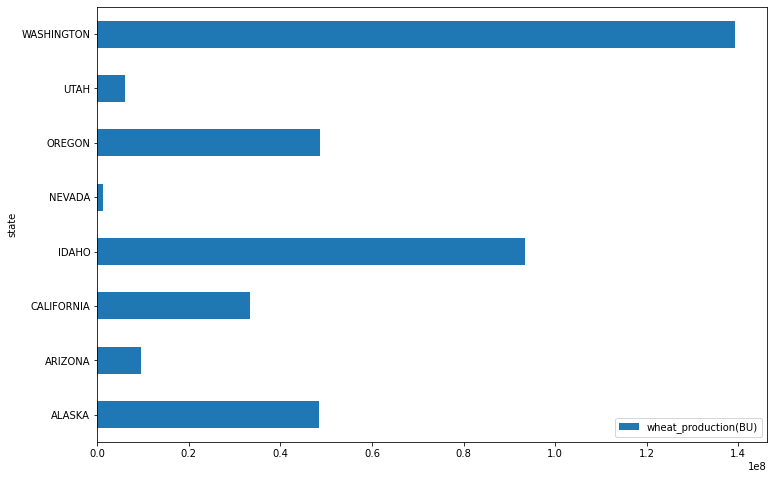

In [13]:
mean_bar(west);

Most productive states in the Western region are Washington, Idaho, & Oregon. The least productive ones are Nevada, Utah, and Arizona.

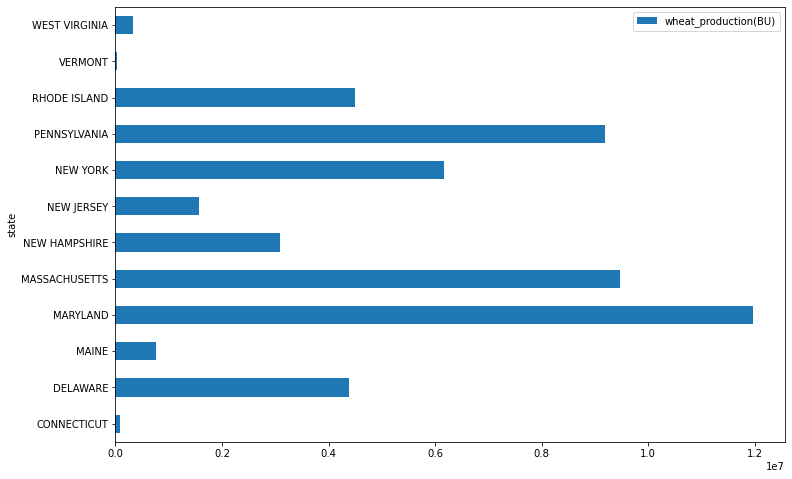

In [14]:
mean_bar(ne);

Top producing States are Maryland and Pennsylvania. The least productive are Vermont and Connecticut. 

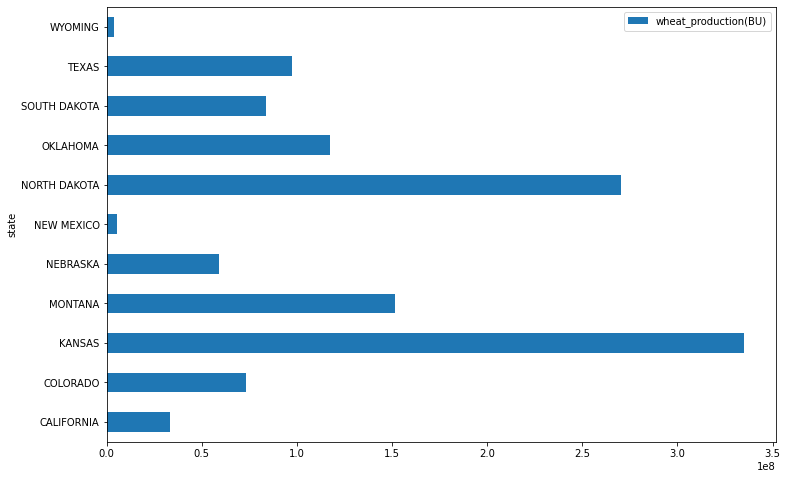

In [15]:
mean_bar(hp);

Top producing states are North Dakota and Kansas.  Least productive states are Wyoming and New Mexico. 

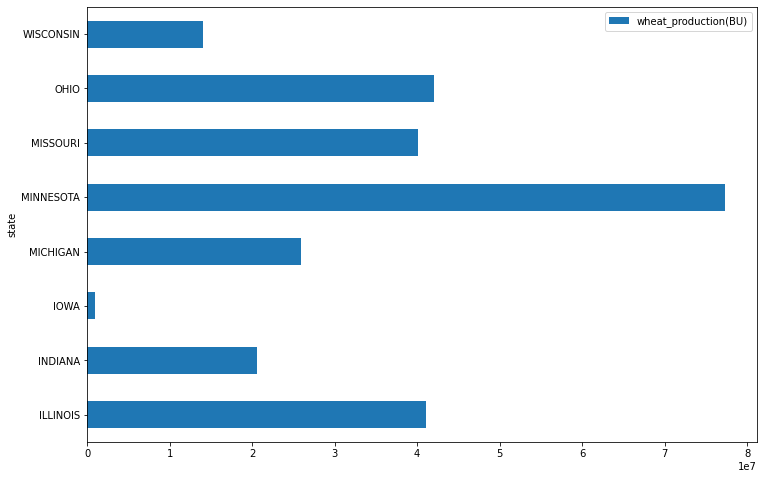

In [16]:
mean_bar(mid);

Minnesotta and Ohio are the most productive while Iowa is the least productive.

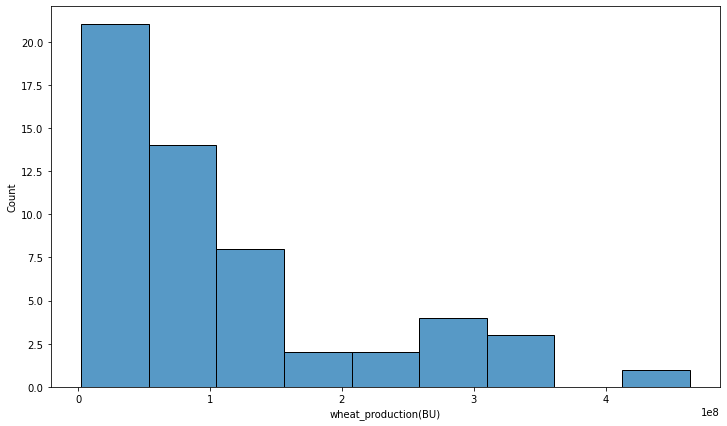

In [18]:
plt.figure(figsize=(12,7))
sns.histplot(hp['wheat_production(BU)']);

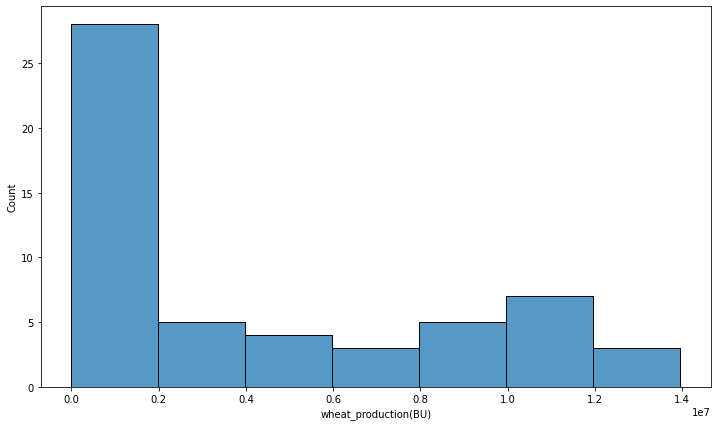

In [19]:
plt.figure(figsize=(12,7))
sns.histplot(ne['wheat_production(BU)']);

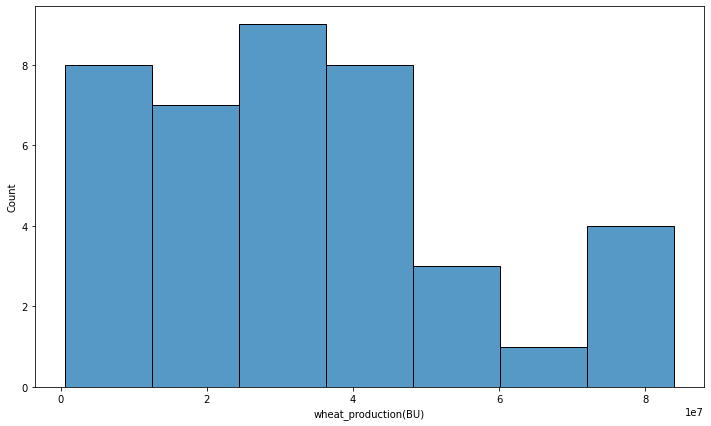

In [20]:
plt.figure(figsize=(12,7))
sns.histplot(mid['wheat_production(BU)']);

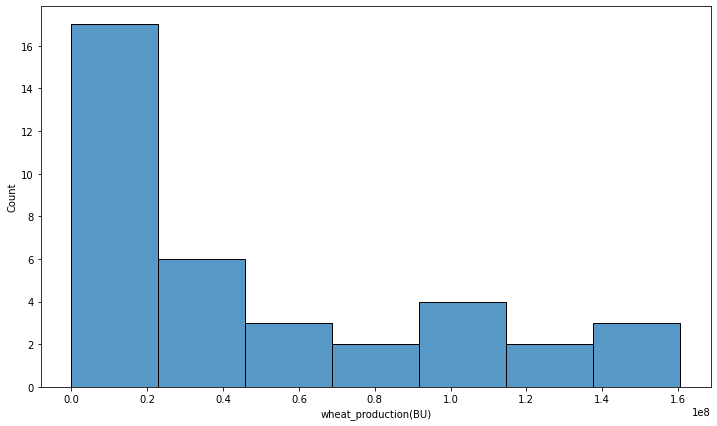

In [21]:
plt.figure(figsize=(12,7))
sns.histplot(west['wheat_production(BU)']);

In [22]:
def plot_bar(df):
    return df.groupby(by=['state'])[['wheat_production(BU)']].mean().plot(figsize=(12,8));
    

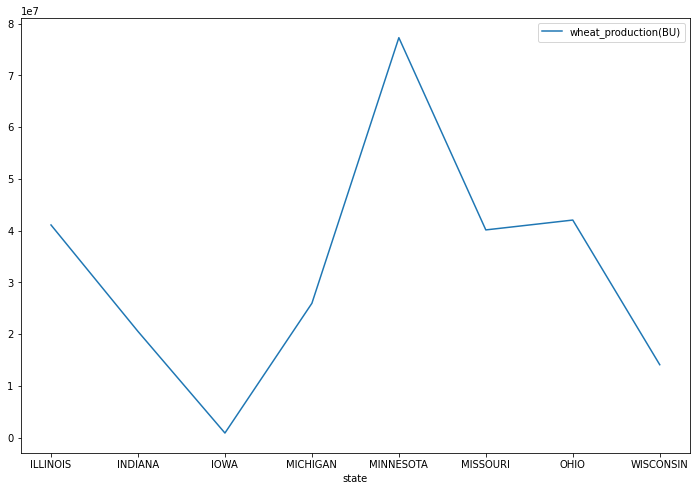

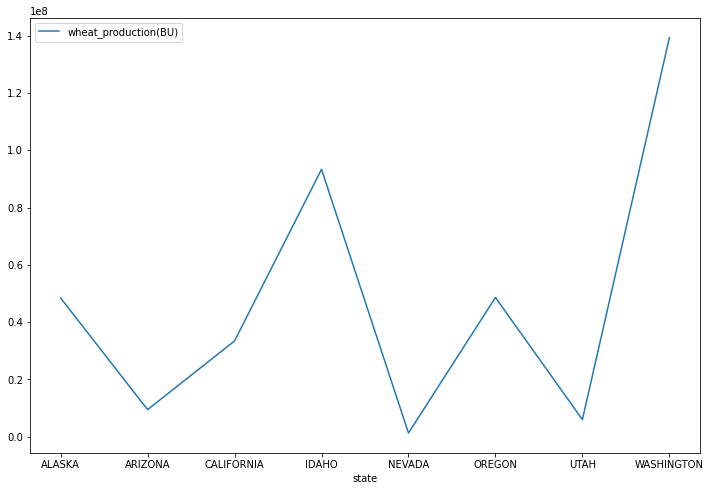

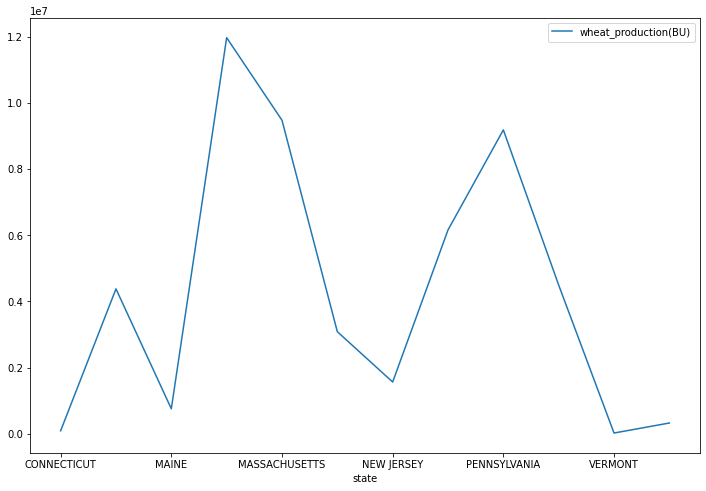

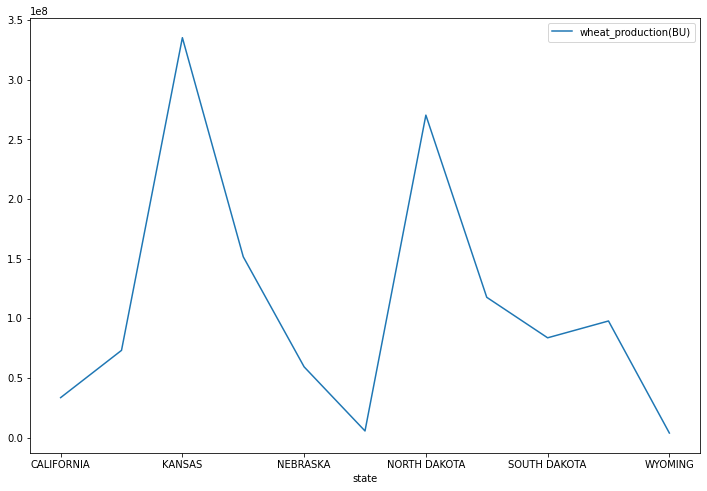

In [23]:
plot_bar(mid)
plot_bar(west)
plot_bar(ne)
plot_bar(hp);

In [25]:
cali=west[west['state'].isin(['CALIFORNIA'])]

cali.head()

,state,state_ansi,commodity,domain,wheat_production(BU),cv_(%)
year,,,,,,
1997-01-01,CALIFORNIA,6,WHEAT,TOTAL,42544545,NaN
2002-01-01,CALIFORNIA,6,WHEAT,TOTAL,33590674,NaN
2007-01-01,CALIFORNIA,6,WHEAT,TOTAL,30224394,NaN
2012-01-01,CALIFORNIA,6,WHEAT,TOTAL,42955324,3.4
2017-01-01,CALIFORNIA,6,WHEAT,TOTAL,17904328,7.5


## Regions

In [27]:
def state_plot(df,st,col):
    df=df[df['state'].isin([st])]
    return df['wheat_production(BU)'].plot(figsize=(12,8),color=col);
    
    
    

In [28]:
west['state'].value_counts()

CALIFORNIA    5
NEVADA        5
WASHINGTON    5
UTAH          5
ARIZONA       5
IDAHO         5
OREGON        5
ALASKA        2
Name: state, dtype: int64

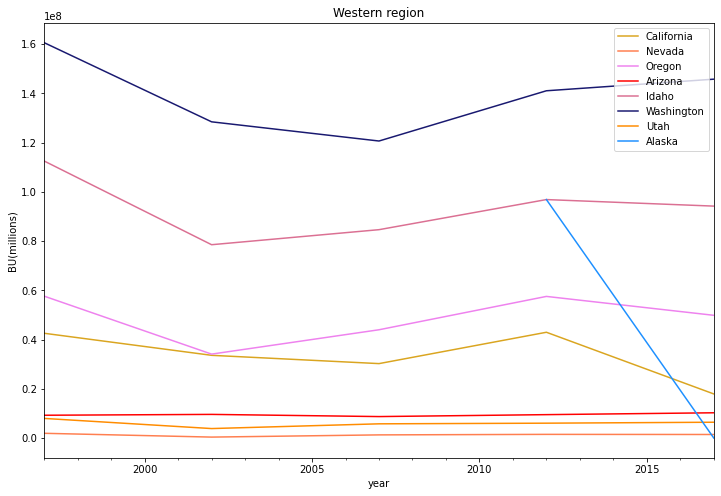

In [64]:
plt.title('Western region')
plt.xlabel('Year')
plt.ylabel('BU(millions)')
state_plot(west,'CALIFORNIA','goldenrod')
state_plot(west,'NEVADA','coral')
state_plot(west,'OREGON','violet')
state_plot(west,'ARIZONA','red')
state_plot(west,'IDAHO','palevioletred')
state_plot(west,'WASHINGTON','midnightblue')
state_plot(west,'UTAH','darkorange')
state_plot(west,'ALASKA','dodgerblue')
plt.legend(['California','Nevada','Oregon','Arizona','Idaho','Washington','Utah','Alaska']);

In [30]:
hp['state'].value_counts()

WYOMING         5
CALIFORNIA      5
TEXAS           5
NEBRASKA        5
SOUTH DAKOTA    5
KANSAS          5
NORTH DAKOTA    5
NEW MEXICO      5
COLORADO        5
OKLAHOMA        5
MONTANA         5
Name: state, dtype: int64

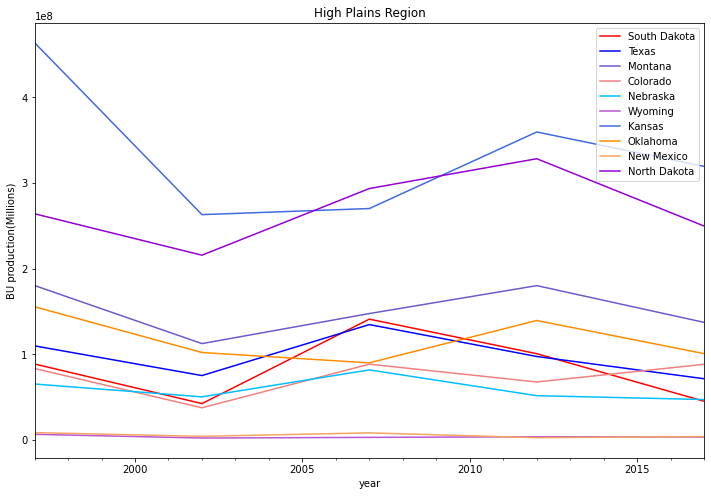

In [31]:
plt.title('High Plains Region')
plt.xlabel('Year')
plt.ylabel('BU production(Millions)')
state_plot(hp,'SOUTH DAKOTA','red')
state_plot(hp,'TEXAS','blue')
state_plot(hp,'MONTANA','slateblue')
state_plot(hp,'COLORADO','lightcoral')
state_plot(hp,'NEBRASKA','deepskyblue')
state_plot(hp,'WYOMING','mediumorchid')
state_plot(hp,'KANSAS','royalblue')
state_plot(hp,'OKLAHOMA','darkorange')
state_plot(hp,'NEW MEXICO','sandybrown')
state_plot(hp,'NORTH DAKOTA','darkviolet')
plt.legend(['South Dakota','Texas','Montana','Colorado','Nebraska','Wyoming',
            'Kansas','Oklahoma','New Mexico','North Dakota']);

Higher producing states look to be impacted more as there are dips once droughts appear in the years of 2012-2013.  States that had lower production(New Mexico and Wyoming) seem to be stable and producing about the same.

In [32]:
ne['state'].value_counts()

NEW YORK         5
DELAWARE         5
MAINE            5
CONNECTICUT      5
PENNSYLVANIA     5
VERMONT          5
WEST VIRGINIA    5
NEW JERSEY       5
MARYLAND         5
MASSACHUSETTS    4
NEW HAMPSHIRE    4
RHODE ISLAND     2
Name: state, dtype: int64

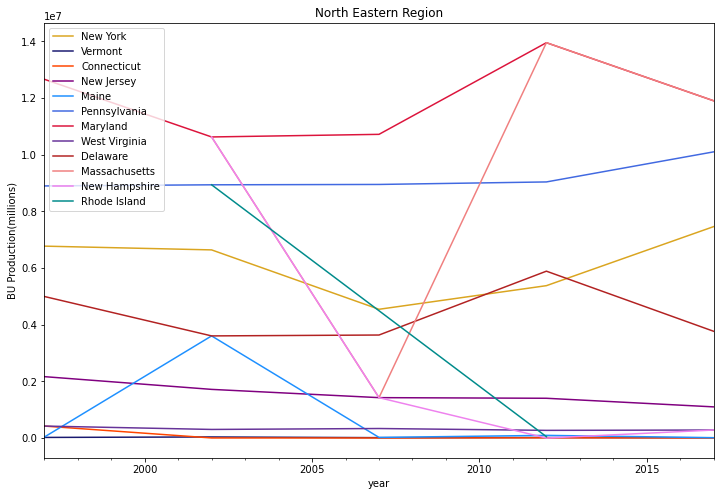

In [33]:
plt.title('North Eastern Region')
plt.xlabel('Year')
plt.ylabel('BU Production(millions)')
state_plot(ne,'NEW YORK','goldenrod')
state_plot(ne,'VERMONT','midnightblue')
state_plot(ne,'CONNECTICUT','orangered')
state_plot(ne,'NEW JERSEY','purple')
state_plot(ne,'MAINE','dodgerblue')
state_plot(ne,'PENNSYLVANIA','royalblue')
state_plot(ne,'MARYLAND','crimson')
state_plot(ne,'WEST VIRGINIA','rebeccapurple')
state_plot(ne,'DELAWARE','firebrick')
state_plot(ne,'MASSACHUSETTS','lightcoral')
state_plot(ne,'NEW HAMPSHIRE','violet')
state_plot(ne,'RHODE ISLAND','darkcyan')
plt.legend(['New York','Vermont','Connecticut','New Jersey','Maine','Pennsylvania','Maryland','West Virginia',
           'Delaware','Massachusetts','New Hampshire','Rhode Island']);

In [34]:
mid['state'].value_counts()

OHIO         5
INDIANA      5
WISCONSIN    5
MISSOURI     5
ILLINOIS     5
MICHIGAN     5
MINNESOTA    5
IOWA         5
Name: state, dtype: int64

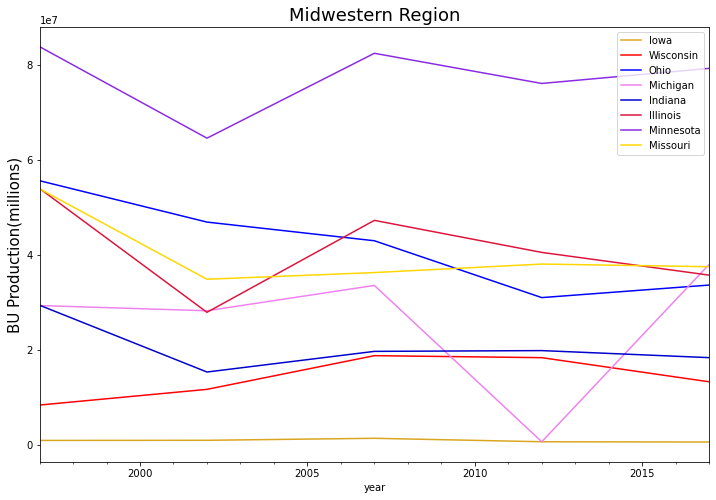

In [88]:
plt.title('Midwestern Region',fontsize=18)
plt.xlabel('Year')
plt.ylabel('BU Production(millions)',fontsize=15)
state_plot(mid,'IOWA','goldenrod')
state_plot(mid,'WISCONSIN','red')
state_plot(mid,'OHIO','blue')
state_plot(mid,'MICHIGAN','violet')
state_plot(mid,'INDIANA','mediumblue')
state_plot(mid,'ILLINOIS','crimson')
state_plot(mid,'MINNESOTA','blueviolet')
state_plot(mid,'MISSOURI','gold')
plt.legend(['Iowa','Wisconsin','Ohio','Michigan','Indiana','Illinois','Minnesota','Missouri']);

## State Level

## West

### Highest producing states

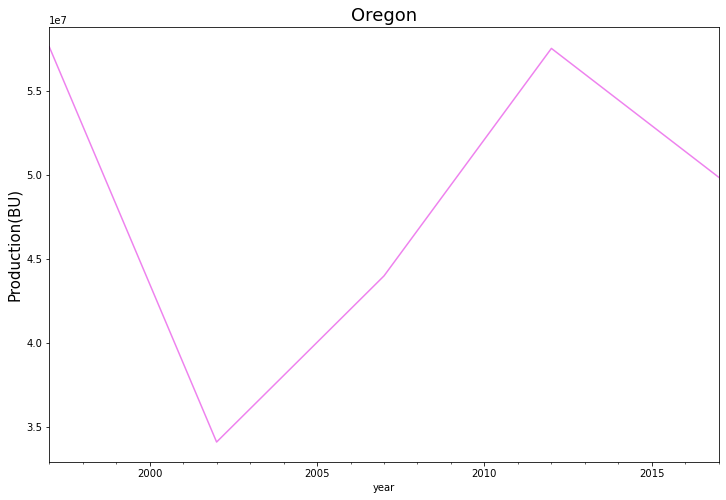

In [87]:
plt.title('Oregon',fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(west,'OREGON','violet');

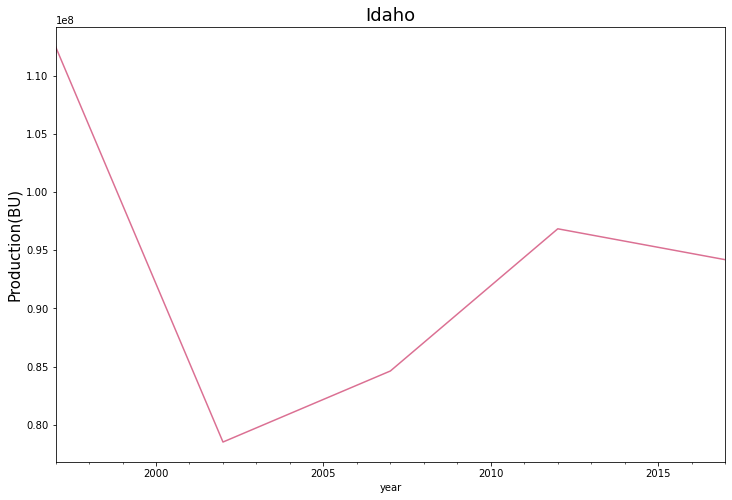

In [86]:
plt.title('Idaho',fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(west,'IDAHO','palevioletred');

### Lower producing states

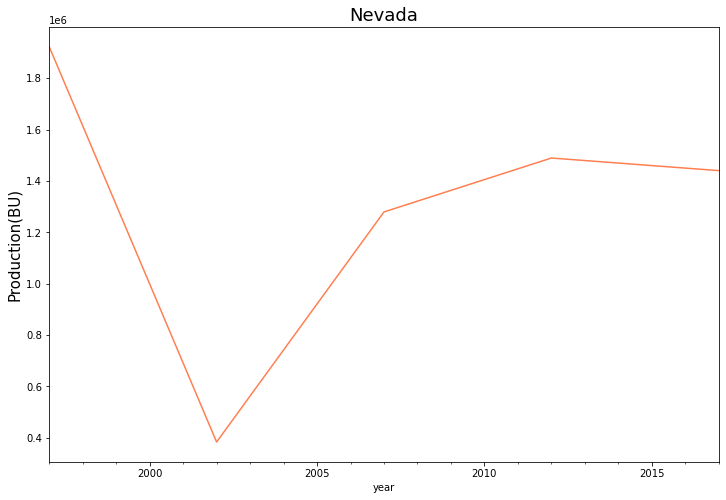

In [85]:
plt.title('Nevada', fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(west,'NEVADA','coral');

### Highplains

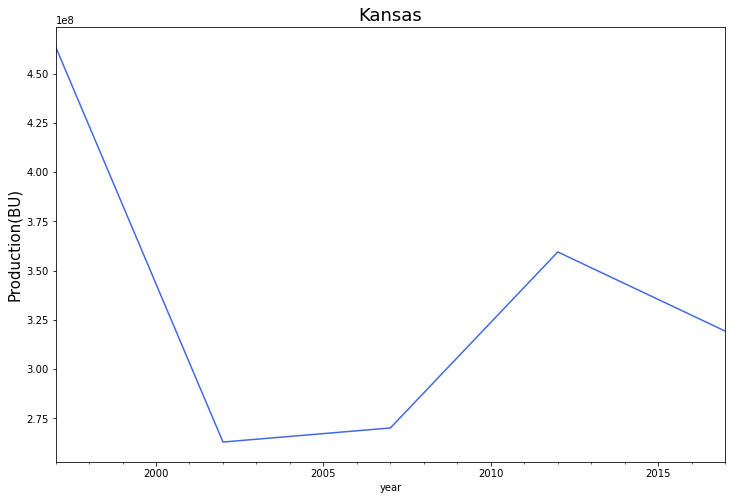

In [89]:
plt.title('Kansas', fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(hp,'KANSAS','royalblue');

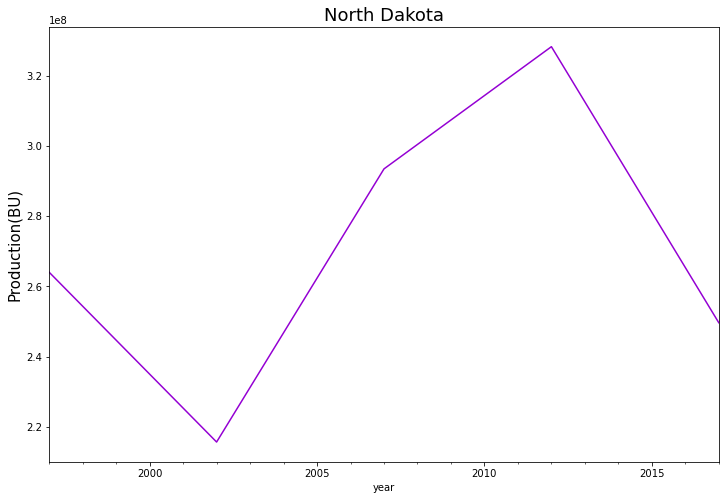

In [90]:
plt.title('North Dakota', fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(hp,'NORTH DAKOTA','darkviolet');

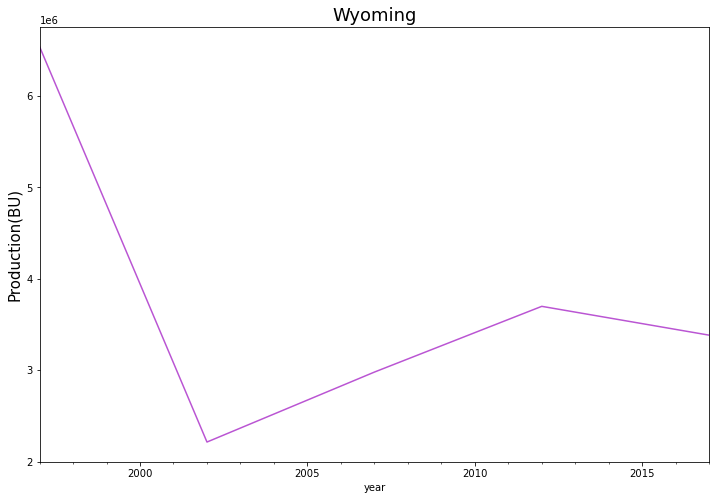

In [91]:
plt.title('Wyoming', fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(hp,'WYOMING','mediumorchid');

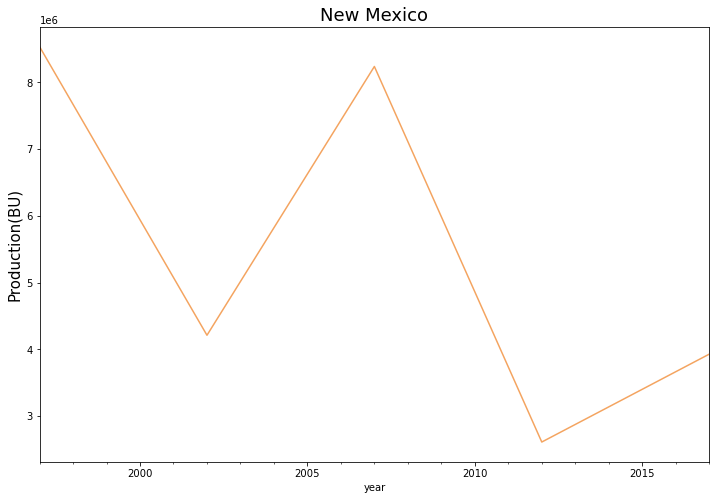

In [92]:
plt.title('New Mexico', fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(hp,'NEW MEXICO','sandybrown');

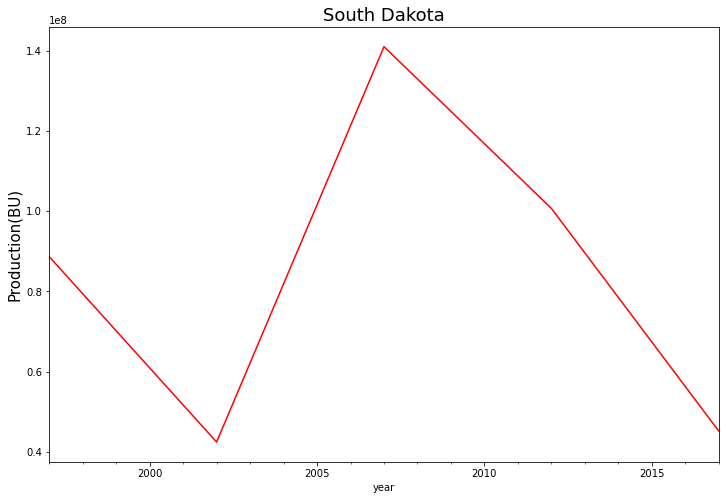

In [93]:
plt.title('South Dakota', fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(hp,'SOUTH DAKOTA','red');

### Northeastern States

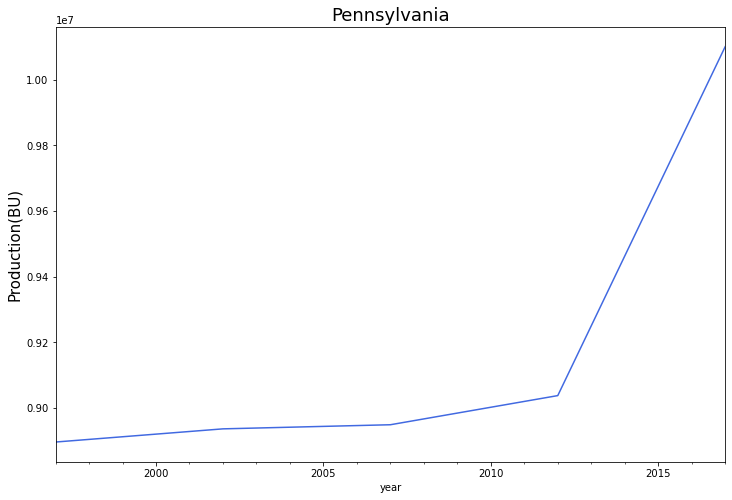

In [94]:
plt.title('Pennsylvania', fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(ne,'PENNSYLVANIA','royalblue');

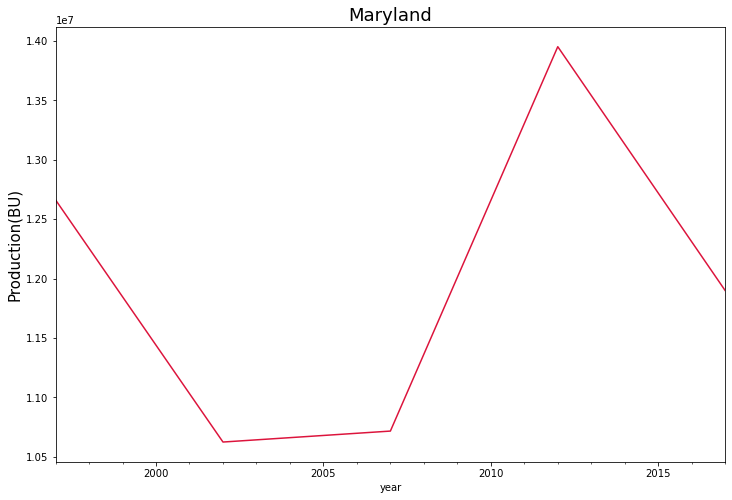

In [95]:
plt.title('Maryland', fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(ne,'MARYLAND','crimson');

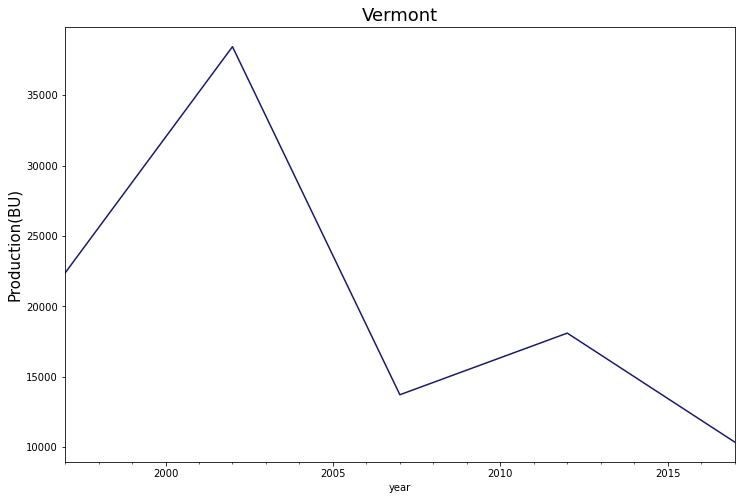

In [96]:
plt.title('Vermont', fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(ne,'VERMONT','midnightblue');

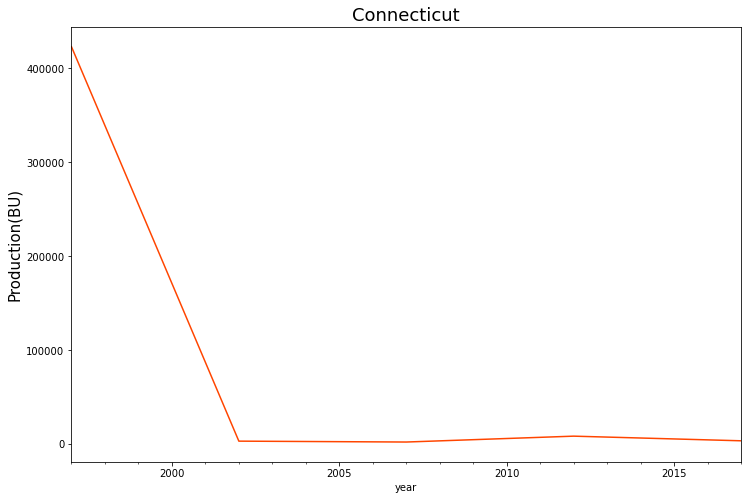

In [97]:
plt.title('Connecticut', fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(ne,'CONNECTICUT','orangered');

### Midwestern States

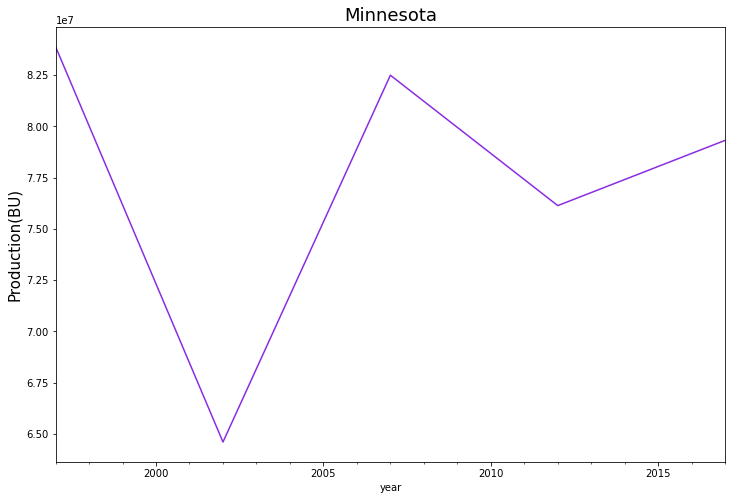

In [98]:
plt.title('Minnesota', fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
plt.ylabel('Production(BU)')
state_plot(mid,'MINNESOTA','blueviolet');

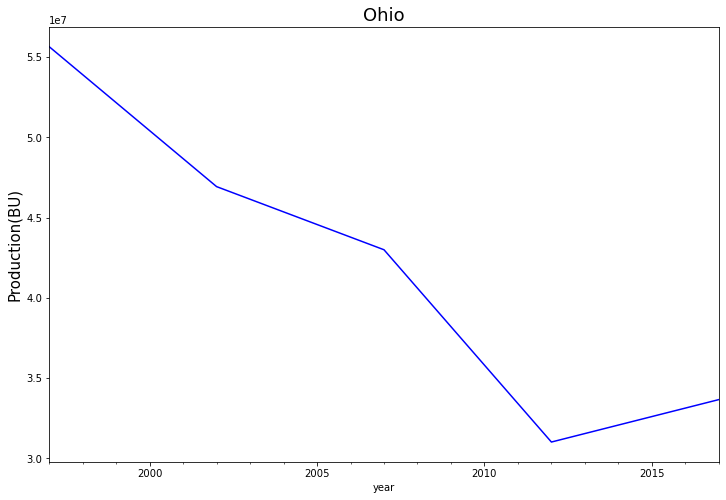

In [99]:
plt.title('Ohio', fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(mid,'OHIO','blue');

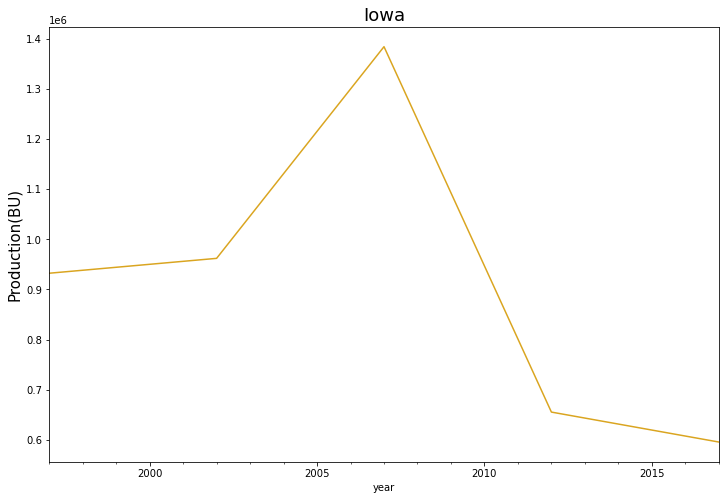

In [100]:
plt.title('Iowa', fontsize=18)
plt.ylabel('Production(BU)',fontsize=15)
state_plot(mid,'IOWA','goldenrod');